<div class="alert alert-info">
    <h1>Аналитика в Яндекс.Афише</h1>
</div>

Стажировка в отделе аналитики Яндекс.Афиши.   

***Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.***  

У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:  
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.
    
Мы изучим:
- как люди пользуются продуктом,
- когда они начинают покупать,
- сколько денег приносит каждый клиент
- когда клиент окупается.

<div class="alert alert-info">
    <h2><a name="0.0"></a> Оглавление</h2>
</div>

* [0. Описание данных и задачи](#0.)
* [1. Загрузка данных и подготовка их к анализу](#1.)
* [2. Постройка отчётов и расчет метрик](#2.)
    - [2.1. Продукт](#2.1.)
        - [2.1.1. Количество людей пользующихся продуктом в день, неделю, месяц](#2.1.1.)
        - [2.1.2. Количество сессий в день](#2.1.2.)
        - [2.1.3. Продолжительность одной сессии](#2.1.3.)
        - [2.1.4. Частота возврата пользователей](#2.1.4.)
    - [2.2. Продажи](#2.2.)
        - [2.2.1. Начало покупки пользователей](#2.2.1.)
        - [2.2.2. Количество покупок за период](#2.2.2.)
        - [2.2.3. Средний чек покупок](#2.2.3.)
        - [2.2.4. Количество денег (LTV)](#2.2.4.)
    - [2.3. Маркетинг](#2.3.)
        - [2.3.1. Количество потраченных денег. Всего / на каждый источник / по времени](#2.3.1.)
        - [2.3.2. Количество потраченных денег на одного покупателя из каждого источника](#2.3.2.)
        - [2.3.3. Окупаемость расходов (ROI)](#2.3.3.)
    - [2.4. Графики LTV CAC ROMI по месяцам в разрезе рекламных источников](#2.4.)
* [3. Общий вывод](#3.)

<div class="alert alert-info">
    <h2><a name="0."></a> Описание данных и задачи</h2>
</div>

<font>[к Оглавлению](#0.0)</font>


Таблица **visits** (лог сервера с информацией о посещениях сайта):  
* **Uid** — уникальный идентификатор пользователя
* **Device** — категория устройства пользователя
* **Start Ts** — дата и время начала сессии
* **End Ts** — дата и время окончания сессии
* **Source Id** — идентификатор рекламного источника, из которого пришел пользователь

Таблица **orders** (информация о заказах):
* **Uid** — уникальный id пользователя, который сделал заказ
* **Buy Ts** — дата и время заказа
* **Revenue** — выручка Яндекс.Афиши с этого заказа

Таблица **costs** (информация о затратах на маркетинг):
* **source_id** — идентификатор рекламного источника
* **dt** — дата
* **costs** — затраты на этот рекламный источник в этот день

### Задачи

#### Шаг 1. Загрузить данные и подготовить их к анализу

#### Шаг 2. Построить отчёты и посчитать метрики
**Продукт**
* Сколько людей пользуются в день, неделю, месяц?
* Сколько сессий в день?
* Сколько длится одна сессия?
* Как часто люди возвращаются?

**Продажи**
* Когда люди начинают покупать?
* Сколько раз покупают за период?
* Какой средний чек?
* Сколько денег приносят? (LTV)

**Маркетинг**
* Сколько денег потратили? Всего / на каждый источник / по времени
* Сколько стоило привлечение одного покупателя из каждого источника?
* На сколько окупились расходы? (ROI)

**Еще**
* Отобразить на графиках, как эти метрики отличаются по устройствам и по рекламным источникам?  
* Как они меняются во времени?

#### Шаг 3. Написать вывод: порекомендовать маркетологам, куда и сколько им стоит вкладывать денег!
* Какие источники/платформы мы бы порекомендовали? 
* Объяснить свой выбор: на какие метрики мы ориентируемся? Почему? 
* Какие выводы мы сделали, узнав значение метрик?

<div class="alert alert-info">
    <h2><a name="1."></a> 1. Загрузка данных и подготовка их к анализу</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np

In [2]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

Посмотрим общую таблицу **visits**, как она выглядит и какие данные есть. Изучим метод info() для просмотра сводной информации о таблице. Изучим описание данных для числовых колонок.

In [3]:
display(visits.head(), visits.info(), visits.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


None

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Посмотрим общую таблицу **orders**, как она выглядит и какие данные есть. Изучим метод info() для просмотра сводной информации о таблице. Изучим описание данных для числовых колонок.

In [4]:
display(orders.head(), orders.info(), orders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


None

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Посмотрим общую таблицу **costs**, как она выглядит и какие данные есть. Изучим метод info() для просмотра сводной информации о таблице. Изучим описание данных для числовых колонок.

In [5]:
display(costs.head(), costs.info(), costs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


None

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [6]:
display(costs.duplicated().sum(), costs.duplicated().sum(), costs.duplicated().sum())

0

0

0

#### Вывод 
- Данные чистые
- Тип данных в колонках нужный, за исключением столбцов с датами, их надо перевести в формат datetime
- Названия столбцов нужно привести к нижнему регистру
- Надо переименовать названия столбцов. Заменть пропуски между столбцами на _

#### По каждой из таблиц (visits, orders, costs) есть столбцы, где необходимо изменить тип данных на `datetime`. 

In [7]:
def date_to_month(dataframes):
    for df in dataframes:
        for column in df.columns:
            if 'Ts' in column:
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
            if 'dt' in column:
                df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
                
date_to_month([visits, orders, costs])

Проверим результат

In [8]:
for df in [visits, orders, costs]:
    display(df.info())
    print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

----------------------------------


#### Приведём название столбцов к нижнему регистру

In [9]:
visits.columns = map(str.lower, visits.columns)
orders.columns = map(str.lower, orders.columns)

#### Заменим названия столбцов на названия с нижним подчеркиванием

In [10]:
display(visits.columns, orders.columns, costs.columns)

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

Index(['buy ts', 'revenue', 'uid'], dtype='object')

Index(['source_id', 'dt', 'costs'], dtype='object')

In [11]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']

In [12]:
display(visits.columns, orders.columns, costs.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Index(['source_id', 'dt', 'costs'], dtype='object')

#### Посмотрим на распределение дат сессий,  заказов, маркетинга

In [13]:
display(visits['start_ts'].describe(), orders['buy_ts'].describe(), costs['dt'].describe())

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Первая сесия, покупка и маркетинг состоялись 1 июня 2017 года. Последняя сессия и маркетинг - 31 мая 2018 года. Последняя покупка — 1 июня 2018 года.

<div class="alert alert-info">
    <h2><a name="2."></a> 2. Постройка отчетов и расчет метрик</h2>
</div>

<div class="alert alert-info">
    <h2><a name="2.1."></a> 2.1. Продукт</h2>
</div>

<div class="alert alert-info">
    <h3><a name="2.1.1."></a> 2.1.1. Количество людей пользующихся продуктом в день, неделю, месяц</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Выделим в отдельные столбцы год, месяц и неделю, а также полную дату

In [14]:
visits['session_year']  = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее

In [15]:
dau_total = visits.groupby(['session_year', 'session_date']).agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Количество людей пользующихся продуктом в день', int(dau_total), 'человек')
print('Количество людей пользующихся продуктом в неделю', int(wau_total), 'человек')
print('Количество людей пользующихся продуктом в месяц', int(mau_total), 'человек')

Количество людей пользующихся продуктом в день 907 человек
Количество людей пользующихся продуктом в неделю 5621 человек
Количество людей пользующихся продуктом в месяц 23228 человек


#### Вывод
Количество людей пользующихся продуктом в день 907 человек  
Количество людей пользующихся продуктом в неделю 5621 человек  
Количество людей пользующихся продуктом в месяц 23228 человек

<div class="alert alert-info">
    <h3><a name="2.1.2."></a> 2.1.2. Количество сессий в день</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Найдем сколько сессий в среднем в день.

In [16]:
sessions_user = visits.groupby('session_date').agg({'uid': ['count']})
sessions_user.columns = ['sum_sessions']
print('Количество сессий в день в среднем', round(sessions_user['sum_sessions'].mean()))
print('Количество сессий в день по медиане', round(sessions_user['sum_sessions'].median()))

Количество сессий в день в среднем 987
Количество сессий в день по медиане 1003


#### Вывод
В среднем количество сесий в день равно 987 штук.  

<div class="alert alert-info">
    <h3><a name="2.1.3."></a> 2.1.3. Продолжительность одной сессии</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Найдем продолжительность одной сессии

In [17]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts'])/ np.timedelta64(1,'m')

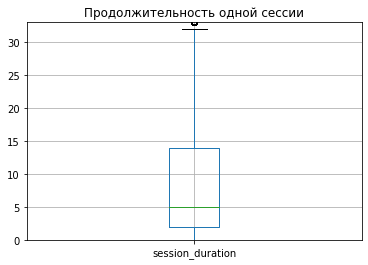

In [18]:
visits.boxplot('session_duration')
plt.ylim(0, 33)
plt.title('Продолжительность одной сессии');

In [19]:
display(visits['session_duration'].reset_index().describe(percentiles=[0.1,  0.5, 0.6, 0.7, 0.8, 0.9, 0.94]).T)

,count,mean,std,min,10%,50%,60%,70%,80%,90%,94%,max
index,359400.0,179699.500000,103749.987711,0.0,35939.900000,179699.5,215639.4,251579.3,287519.2,323459.1,337835.06,359399.0
session_duration,359400.0,10.717095,16.618796,-46.0,0.316667,5.0,7.0,11.0,17.0,27.0,35.00,711.0


Уберем выбросы, все что более 35 минут, и посчитаем данные. Выбросы составили 6% от данных, и остатка нам хватит для расчета.

In [20]:
visits_session = visits.query('session_duration > 0 and session_duration <= 35')

In [21]:
print('Продолжительность одной сессии в среднем', round(visits_session['session_duration'].mean(), 2), 'минут')
print('Продолжительность одной сессии по медиане', round(visits_session['session_duration'].median(), 2), 'минут')
print('Продолжительность одной сессии по моде', round(visits_session['session_duration'].mode(), 2), 'минут')

Продолжительность одной сессии в среднем 8.63 минут
Продолжительность одной сессии по медиане 5.0 минут
Продолжительность одной сессии по моде 0    1.0
dtype: float64 минут


#### Вывод
Продолжительность одной сессии среднее 8,6 минут  
Продолжительность одной сессии по медиане 5 минут  
Продолжительность одной сессии по моде 1 минута  
Мода равняется 1 минуте. Если пользователь успевает за это время сделать заказ, то всё отлично, а если нет — нужно проверить, что ему мешает.

<div class="alert alert-info">
    <h3><a name="2.1.4."></a> 2.1.4. Частота возврата людей на сайт</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Расчитаем показатель Retention Rate. Он показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Перепишем наш датафрейм в новый, что бы убрать лишние столбцы, которые нам будут мешать

In [22]:
visits['activity_date'] = pd.to_datetime(visits['session_date'])
visits_new = visits[['device','uid','activity_date','source_id']]

Найдем дату, когда пользователь впервые проявил активность

In [23]:
first_activity_date = visits_new.groupby(['uid'])['activity_date'].min()
first_activity_date.name = 'first_activity_date'

user_activity = visits_new.join(first_activity_date,on='uid')
user_activity.head()

,device,uid,activity_date,source_id,first_activity_date
0,touch,16879256277535980062,2017-12-20,4,2017-12-20
1,desktop,104060357244891740,2018-02-19,2,2018-02-19
2,touch,7459035603376831527,2017-07-01,5,2017-07-01
3,desktop,16174680259334210214,2018-05-20,9,2018-03-09
4,desktop,9969694820036681168,2017-12-27,3,2017-12-27


Сформируем когорты по данным за месяц. Получим день начала месяца, за которую произошло событие.

In [24]:
user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')
user_activity['activity_month'] = user_activity['activity_date'].astype('datetime64[M]')

Для каждой строки датафрейма рассчитаем `lifetime` пользователя в рамках когорты.

In [25]:
user_activity['cohort_lifetime'] = user_activity['activity_date'] - user_activity['first_activity_month']
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype('int')
user_activity.head();

Сгруппируем данные по когорте и `lifetime`. Посчитаем для каждой когорты количество активных пользователей на определённую неделюю

In [26]:
cohorts = user_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.head()

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1007
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Найдём исходное количество пользователей в когорте.

In [27]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count.head()

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Переименуем столбец `uid` в `cohort_users`

In [28]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count.head();

Объединим данные по когортам с исходным количеством пользователей в когорте.

In [29]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')
cohorts.head()

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1007,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259


Разделим количество активных пользователей в каждом месяце на исходное число пользователей в когорте. Построим сводную таблицу.

In [30]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06,1.0,0.075948,0.053775,0.061392,0.068557,0.071423,0.061015,0.056716,0.054227,0.049702,0.041632,0.044121
2017-07,1.0,0.054642,0.053120,0.054490,0.060046,0.047412,0.044901,0.048935,0.037139,0.029072,0.026941,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.043021,0.040369,0.035949,0.028386,0.025440,NaN,NaN
2017-09,1.0,0.081597,0.070342,0.049509,0.039392,0.040230,0.033345,0.024605,0.021971,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.037764,0.038034,0.030027,0.021865,0.019787,NaN,NaN,NaN,NaN
2017-11,1.0,0.073877,0.044113,0.040847,0.032149,0.023965,0.020735,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.054377,0.041238,0.029009,0.020856,0.018363,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.062544,0.037217,0.024266,0.019714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.048880,0.026310,0.018606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cоздадим тепловую карту

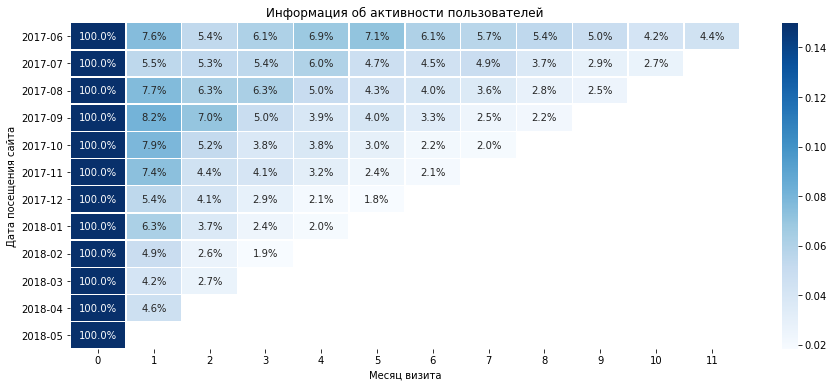

In [31]:
plt.figure(figsize=(15, 6))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=0.5, cmap='Blues', vmax=0.15)
plt.title('Информация об активности пользователей')
plt.xlabel('Месяц визита')
plt.ylabel('Дата посещения сайта')
plt.show()

#### Вывод
В основном 90-95% людей уходит, в целом бизнес "одноразовый".
Retention Rate в первый месяц убывает по когортам с течением времени. Если для когорты пользователей, пришедших в июне 2017 Retention Rate в первый месяц составляет 7,6%, то для пользователей, пришедших в апреле 2018 — уже 4,6%. Так, за 11 месяцев коэффициент удержания упал на 3%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

<div class="alert alert-info">
    <h2><a name="2.2."></a> 2.2. Продажи</h2>
</div>

<div class="alert alert-info">
    <h3><a name="2.2.1."></a> 2.2.1. Когда люди начинают покупать?</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Сгруппируем данные и получим время первого заказа. Добавим столбец в таблицу `orders`

In [32]:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min() 
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on='uid')
orders.head()

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


Добавим в таблицу `orders` время первого посещения сайта

In [33]:
first_visit_date = visits.groupby('uid')['start_ts'].min() 
first_visit_date.name = 'first_visit_date'
orders = orders.join(first_visit_date,on='uid')
orders.head()

,buy_ts,revenue,uid,first_order_date,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00


Узнаем разницу во времени от первого посещения до первого заказа. Приведем значения к минутам

In [34]:
orders['order_time'] = (orders['first_order_date'] - orders['first_visit_date']) / np.timedelta64(1,'m')
orders.head()

,buy_ts,revenue,uid,first_order_date,first_visit_date,order_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0


Взглянем на распределение

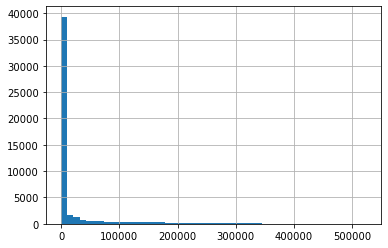

In [35]:
orders['order_time'].hist(bins=50)

Посмотрим как на графике отображено время до первой покупки

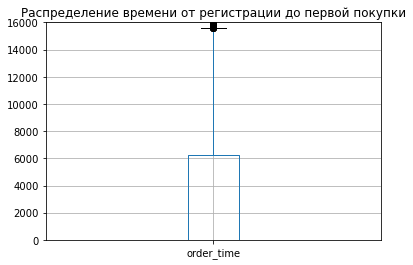

In [36]:
orders.boxplot('order_time')
plt.ylim(0, 16000)
plt.title('Распределение времени от регистрации до первой покупки');

In [37]:
display(orders['order_time'].reset_index().describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]).T)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,max
index,50415.0,25207.000000,14553.701247,0.0,5041.4,10082.8,15124.2,20165.6,25207.0,30248.4,35289.8,40331.2,45372.6,49909.86,50414.0
order_time,50415.0,25368.990618,66910.801873,0.0,1.0,3.0,6.0,11.0,22.0,125.0,2144.0,15731.6,90788.0,331122.72,523144.0


Уберем выбросы из наших расчетов и ограничим верхним пределом боксплота

In [38]:
orders_time = orders.query('order_time < 16000')
orders_time;

In [39]:
print('Время от первого события до первой покупки в среднем', round(orders_time['order_time'].mean()/ 60, 1), 'часов')
print('Время от первого события до первой покупки по медиане', round(orders_time['order_time'].median(), 1), 'минут')
print('Время от первого события до первой покупки по моде', round(orders_time['order_time'].mode(), 1), 'минут')

Время от первого события до первой покупки в среднем 17.0 часов
Время от первого события до первой покупки по медиане 11.0 минут
Время от первого события до первой покупки по моде 0    0.0
dtype: float64 минут


#### Вывод 
В среднем покупателю требуется 17 часов на покупку. По медиане 11 минут.  
В данных очень большие выбросы.
Покупают почти сразу. Долги сессии это не покупатели, а люди которым некуда деть свободное время.

<div class="alert alert-info">
    <h3><a name="2.2.2."></a> 2.2.2. Количество покупок за период</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Найдем сколько совершается покупок в день, неделю. месяц.  
добавим столбцы с нужными нам датами и сгруппируем по дням, неделям и месяцу с расчетом количества покупок в эти промежутки времени.

In [40]:
orders_pur = orders[['buy_ts', 'uid', 'revenue']].copy()
orders_pur['orders_day'] = orders['buy_ts'].astype('datetime64[D]')
orders_pur['orders_week'] = orders['buy_ts'].astype('datetime64[W]')
orders_pur['orders_month'] = orders['buy_ts'].astype('datetime64[M]')
orders_pur_day = orders_pur.groupby('orders_day').agg({'uid': ['count']})
orders_pur_week = orders_pur.groupby('orders_week').agg({'uid': ['count']})
orders_pur_month = orders_pur.groupby('orders_month').agg({'uid': ['count']})
orders_pur_day.head()

,uid
,count
orders_day,
2017-06-01,96
2017-06-02,111
2017-06-03,67
2017-06-04,66
2017-06-05,161


Посмотрим как выглядит распределение покупок по дням.

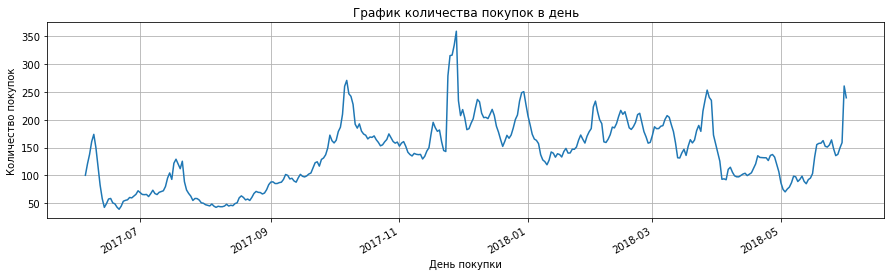

In [41]:
orders_pur_day[('uid', 'count')].rolling(5).mean().plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('День покупки')
plt.ylabel('Количество покупок')
plt.title('График количества покупок в день')
plt.show()

Посмотрим как выглядит распределение покупок по неделям.

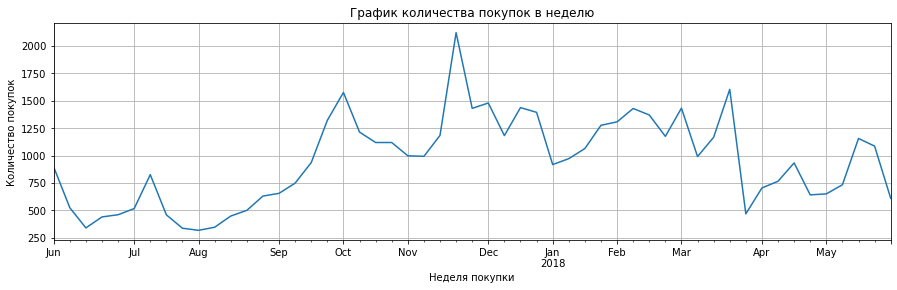

In [42]:
orders_pur_week[('uid', 'count')].plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Неделя покупки')
plt.ylabel('Количество покупок')
plt.title('График количества покупок в неделю')
plt.show()

Посмотрим как выглядит распределение покупок по месяцам.

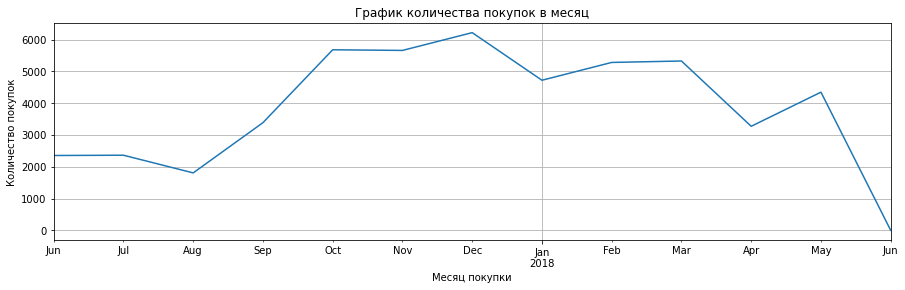

In [43]:
orders_pur_month[('uid', 'count')].plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц покупки')
plt.ylabel('Количество покупок')
plt.title('График количества покупок в месяц')
plt.show()

In [44]:
print('Количество покупок в среднем в день', round(orders_pur_day[('uid', 'count')].mean(),1))
print('Количество покупок в среднем в неделю', round(orders_pur_week[('uid', 'count')].mean(),1))
print('Количество покупок в среднем в месяц', round(orders_pur_month[('uid', 'count')].mean(),1))

Количество покупок в среднем в день 138.5
Количество покупок в среднем в неделю 951.2
Количество покупок в среднем в месяц 3878.1


Найдем сколько в среднем пользователь совершает покупок.

In [45]:
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')#.dt.month_name()
orders_user = orders.groupby('orders_month').agg({'uid': ['count','nunique']})
orders_user.columns = ['n_orders', 'n_users']
orders_user['orders_per_user_month'] = orders_user['n_orders'] / orders_user['n_users']
print('Количество покупок в среднем в месяц одним пользователем', round(orders_user['orders_per_user_month'].mean(),1))

Количество покупок в среднем в месяц одним пользователем 1.2


Отобразим это на графике

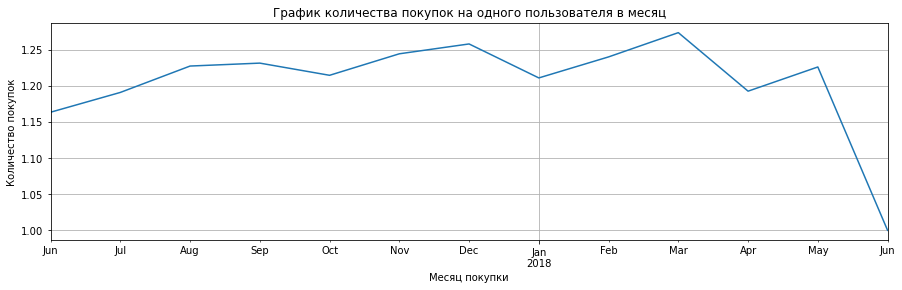

In [46]:
orders_user['orders_per_user_month'].plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц покупки')
plt.ylabel('Количество покупок')
plt.title('График количества покупок на одного пользователя в месяц')
plt.show()

#### Вывод 
Количество покупок в среднем в день 138.5  
Количество покупок в среднем в неделю 951.2  
Количество покупок в среднем в месяц 3878.1  
В среднем пользователь совершает 1.2 покупки в месяц.  
Наибольшее количество покупок было в декабре 2017 года и марте 2018 года.

<div class="alert alert-info">
    <h3><a name="2.2.3."></a> 2.2.3. Средний чек продаж</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

In [47]:
print('Средний чек продажи', round(orders['revenue'].mean(),2))

Средний чек продажи 5.0


In [48]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [49]:
orders_pur.head()

,buy_ts,uid,revenue,orders_day,orders_week,orders_month
0,2017-06-01 00:10:00,10329302124590727494,17.00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,11627257723692907447,0.55,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,17903680561304213844,0.37,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,16109239769442553005,0.55,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,14200605875248379450,0.37,2017-06-01,2017-06-01,2017-06-01


In [50]:
orders_pur_day = orders_pur.groupby('orders_day').agg({'revenue': ['mean']})
orders_pur_week = orders_pur.groupby('orders_week').agg({'revenue': ['mean']})
orders_pur_month = orders_pur.groupby('orders_month').agg({'revenue': ['mean']})
orders_pur_month.head()

,revenue
,mean
orders_month,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280


In [51]:
print('Средний чек в день', round(orders_pur_day[('revenue', 'mean')].mean(),2))
print('Средний чек в неделю', round(orders_pur_week[('revenue', 'mean')].mean(),2))
print('Средний чек в месяц', round(orders_pur_month[('revenue', 'mean')].mean(),2))

Средний чек в день 4.94
Средний чек в неделю 5.0
Средний чек в месяц 4.84


Посмотрим как выглядит распределение суммы среднего чека по дням.

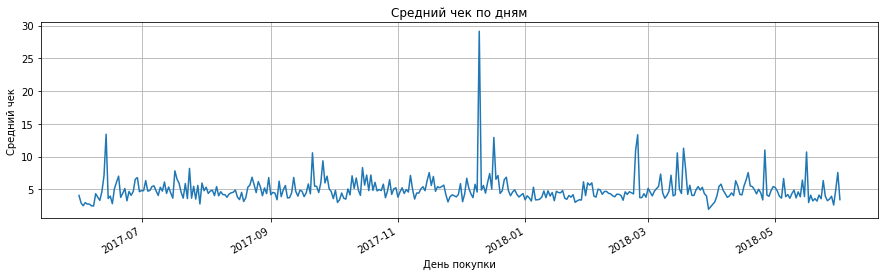

In [52]:
orders_pur_day[('revenue', 'mean')].plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('День покупки')
plt.ylabel('Средний чек')
plt.title('Средний чек по дням')
plt.show()

Посмотрим как выглядит распределение суммы среднего чека по неделям.

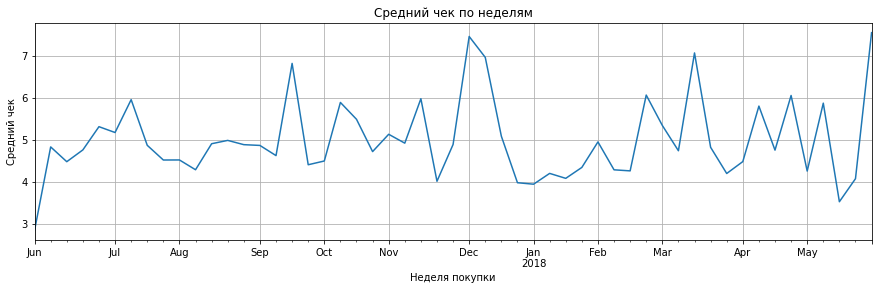

In [53]:
orders_pur_week[('revenue', 'mean')].plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Неделя покупки')
plt.ylabel('Средний чек')
plt.title('Средний чек по неделям')
plt.show()

Посмотрим как выглядит распределение суммы среднего чека по месяцам.

In [54]:
orders_pur_month

,revenue
,mean
orders_month,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280
2017-11-01,4.783518
2017-12-01,5.852139
2018-01-01,4.112927


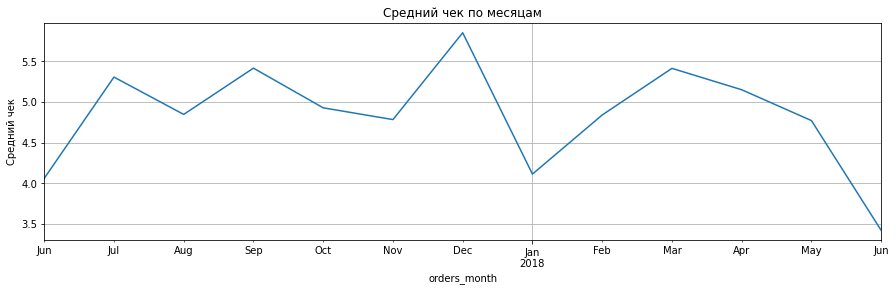

In [55]:
orders_pur_month[('revenue', 'mean')].plot(grid=True, style='-', figsize=(15, 4))
plt.ylabel('Средний чек')
plt.title('Средний чек по месяцам')
plt.show()

#### Вывод
Средний чек в день 4.94  
Средний чек в неделю 5.0  
Средний чек в месяц 4.84    
 
Средний чек разный в каждом месяце. В декабре средний чек выше всех других месяцев. Самый маленький чек в январе 2018 года.

<div class="alert alert-info">
    <h3><a name="2.2.4."></a> 2.2.4. Количество денег (LTV)</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Выделим месяцы из дат в таблицe с расходами. В таблице с доходами мы уже это сделали.

In [56]:
costs['month'] = costs['dt'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_order_date,first_visit_date,order_time,orders_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01


Посчитаем количество новых покупателей `n_buyers` за каждый месяц

In [57]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index()

In [58]:
cohorts = orders.groupby(['first_order_month','orders_month']).agg({'revenue': 'sum'}).reset_index() # сгруппируем зазазы в когорты
cohorts.head()

,first_order_month,orders_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу `cohorts` данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [59]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month') # объединим cohorts и cohort_sizes
report.head()

,first_order_month,n_buyers,orders_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Найдем валовую прибыль, умножив выручку на маржинальность. Маржинальность примем за 1. Добавим возраст когорты.

In [60]:
margin_rate = 1 # маржинальность магазина
report['gp'] = report['revenue'] * margin_rate # посчитаем валовую прибыль
report['age'] = (report['orders_month'] - report['first_order_month']) / np.timedelta64(1, 'M') # посчитаем возраст каждой когорты в месяцах, не забудьте что возраст должен быть целым значением 
report['age'] = report['age'].round().astype('int')

Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.

In [61]:
report['ltv'] = report['gp'] / report['n_buyers'] # посчитаем LTV когорт
report

,first_order_month,n_buyers,orders_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


In [62]:
result = (report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2))
result = result.cumsum(axis=1).round(2)

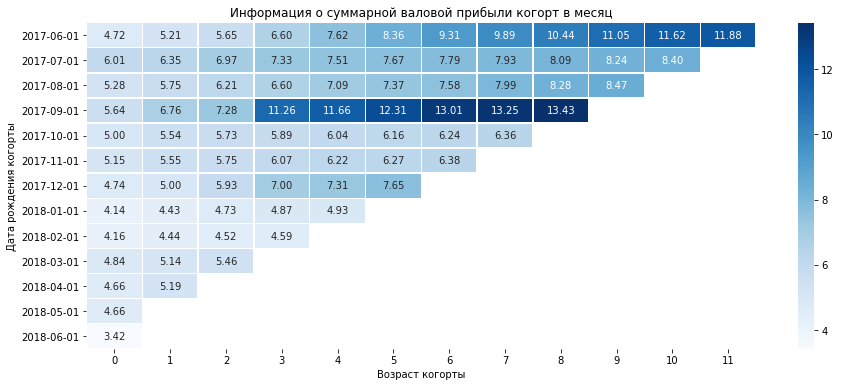

In [63]:
plt.figure(figsize=(15, 6))
ax=sns.heatmap(result, annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
ax.set_yticklabels(result.index.date)
plt.title('Информация о суммарной валовой прибыли когорт в месяц')
plt.xlabel('Возраст когорты')
plt.ylabel('Дата рождения когорты')
plt.show()

Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам.  
LTV - итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок.

In [64]:
ltv_201706 = result.loc['2017-06-01'].sum()
print('Итоговый LTV первой когорты',ltv_201706)

Итоговый LTV первой когорты 102.35000000000001


#### Вывод:
В среднем каждый покупатель из первой когорты принес по 11.88 рублей выручки за 12 месяцев «жизни».

<div class="alert alert-info">
    <h2><a name="2.3."></a> 2.3. Маркетинг</h2>
</div>

<div class="alert alert-info">
    <h3><a name="2.3.1."></a> 2.3.1. Количество потраченных денег. Всего / на каждый источник / по времени</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посчитаем расходы за весь период

In [65]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [66]:
print('Расходы за весь период составили',costs['costs'].sum(), 'р.')

Расходы за весь период составили 329131.62 р.


Посмотрим расходы на каждый месяц.

In [67]:
costs_table = costs.pivot_table(index='month', values='costs', aggfunc='sum')
costs_table

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


Построим график распределения затрат по месяцам 

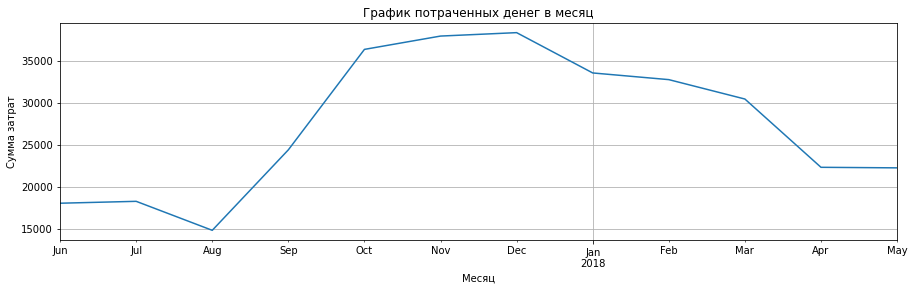

In [68]:
costs_table['costs'].plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц')
plt.ylabel('Сумма затрат')
plt.title('График потраченных денег в месяц')
plt.show()

Рассчитаем затраты на каждый рекламный источник

In [69]:
costs_source = costs.pivot_table(index='source_id', values='costs', aggfunc='sum')
costs_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Построим график распределения затрат по рекламным источникам

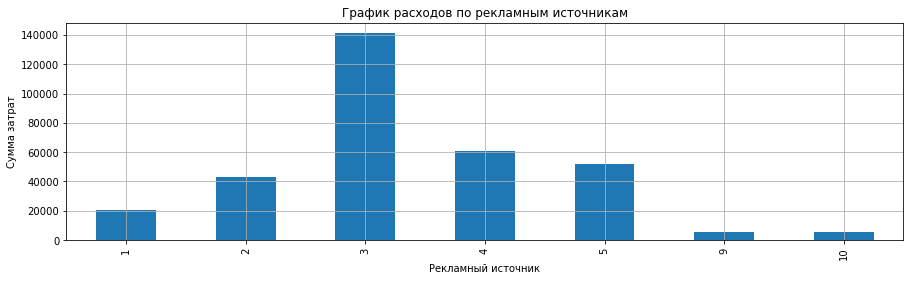

In [70]:
costs_source['costs'].plot(grid=True, kind='bar', figsize=(15, 4))
plt.xlabel('Рекламный источник')
plt.ylabel('Сумма затрат')
plt.title('График расходов по рекламным источникам')
plt.show()

Всего было затрачено 329131 р. Наибольшее кол-во затрат произошло в период с октября по декабрь 2017 года. По источникам рекламы, наибольшее количество денег вложено в источник 3, наименьшие вложения в - 9 и 10 источник.

<div class="alert alert-info">
    <h3><a name="2.3.2."></a> 2.3.2. Стоимость привлечения одного покупателя из каждого источника</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Расходы по рекламным источникам у нас уже посчитаны в переменной `costs_source` 

In [71]:
costs_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


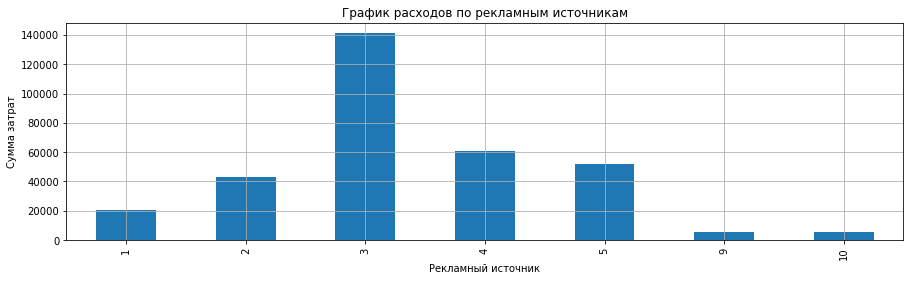

In [72]:
costs_source['costs'].plot(grid=True, kind='bar', figsize=(15, 4))
plt.xlabel('Рекламный источник')
plt.ylabel('Сумма затрат')
plt.title('График расходов по рекламным источникам')
plt.show()

In [73]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [74]:
source_cost = costs.pivot_table(index='month', columns='source_id', values='costs')
source_cost

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,37.520333,80.912667,257.721667,117.160000,87.204000,9.507333,10.474000
2017-07-01,34.609032,75.261613,247.560323,113.862258,96.714194,9.759355,10.639355
2017-08-01,30.703548,58.420968,198.178710,103.785806,70.492903,8.030000,7.502258
2017-09-01,50.067000,99.522000,332.118333,173.075333,128.304667,13.854000,15.355667
2017-10-01,74.701613,156.290323,507.652903,207.123871,186.045161,19.658387,20.233548
2017-11-01,81.505333,174.922667,567.511333,179.627333,210.844667,22.772667,26.412000
2017-12-01,75.522581,157.993548,523.210323,247.757097,189.436129,21.225161,20.834194
2018-01-01,70.521935,134.120645,477.702581,188.154516,173.274839,17.650323,19.817742
2018-02-01,78.731429,159.797857,508.162857,203.998571,181.118214,19.696429,17.174286


In [75]:
month_lst = ['June', 'July', 'August', 'September', 'October', 'November', \
             'December', 'January', 'February', 'March', 'April', 'May']

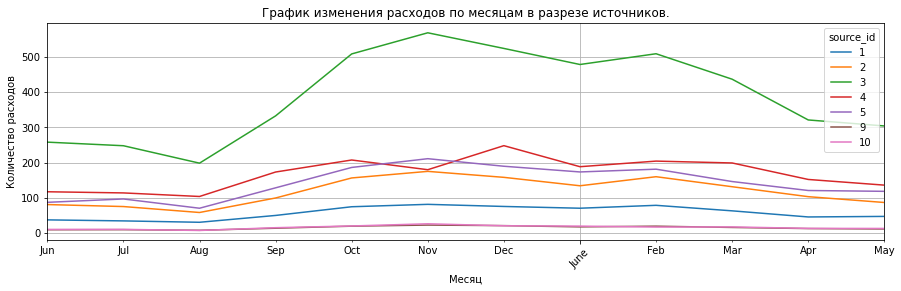

In [76]:
ax = source_cost.plot(grid=True, style='-', figsize=(15, 4))
ax.set_xticklabels(month_lst, rotation=45)
plt.xlabel('Месяц')
plt.ylabel('Количество расходов')
plt.title('График изменения расходов по месяцам в разрезе источников.')
plt.show()

Считаем кол-во новых покупателей по источникам

In [77]:
first_source_per_user = visits.groupby('uid').agg({'source_id': 'first'})
first_source_per_user.head()

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5


Объединяем полученную таблицу с данными о по какому источнику пришел покупатель с данными о покупках

In [78]:
client_per_source = orders.merge(first_source_per_user, on='uid')
client_per_source

,buy_ts,revenue,uid,first_order_date,first_visit_date,order_time,orders_month,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.0,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.0,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.0,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.0,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.0,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,879.0,2018-05-01,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,45.0,2018-05-01,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,2.0,2018-05-01,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,317484.0,2018-05-01,2018-05-01,4


Сгруппируем покупателей с источниками рекламы и получим количество покупателей по источникам

In [79]:
client_per_source = client_per_source.groupby(['first_order_month','source_id']).agg({'uid': 'nunique'}).reset_index()
client_per_source

,first_order_month,source_id,uid
0,2017-06-01,1,203
1,2017-06-01,2,271
2,2017-06-01,3,574
3,2017-06-01,4,417
4,2017-06-01,5,368
...,...,...,...
81,2018-05-01,4,767
82,2018-05-01,5,510
83,2018-05-01,9,53
84,2018-05-01,10,117


Соеденим таблицу с расходами на источник и таблицу с количеством покупателей

In [80]:
report_cost = costs_source.merge(client_per_source, on='source_id')
report_cost

,source_id,costs,first_order_month,uid
0,1,20833.27,2017-06-01,203
1,1,20833.27,2017-07-01,211
2,1,20833.27,2017-08-01,145
3,1,20833.27,2017-09-01,283
4,1,20833.27,2017-10-01,409
...,...,...,...,...
80,10,5822.49,2018-01-01,87
81,10,5822.49,2018-02-01,126
82,10,5822.49,2018-03-01,178
83,10,5822.49,2018-04-01,112


Посчитаем сколько потрачено денег на одного покупателя из каждого источника

In [81]:
report_cost['cac_uid'] = round(report_cost['costs'] / report_cost['uid'], 2)
report_cost

,source_id,costs,first_order_month,uid,cac_uid
0,1,20833.27,2017-06-01,203,102.63
1,1,20833.27,2017-07-01,211,98.74
2,1,20833.27,2017-08-01,145,143.68
3,1,20833.27,2017-09-01,283,73.62
4,1,20833.27,2017-10-01,409,50.94
...,...,...,...,...,...
80,10,5822.49,2018-01-01,87,66.93
81,10,5822.49,2018-02-01,126,46.21
82,10,5822.49,2018-03-01,178,32.71
83,10,5822.49,2018-04-01,112,51.99


In [82]:
print('В среднем c 1 покупателя получено', round(report['ltv'].mean(), 2))
print('В среднем на 1 покупателя потрачено', round(report_cost['cac_uid'].mean(), 2))

В среднем c 1 покупателя получено 1.15
В среднем на 1 покупателя потрачено 823.06


<div class="alert alert-info">
    <h3><a name="2.3.3."></a> 2.3.3. Окупаемость расходов (ROI)</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Найдём суммарные расходы за каждый месяц, а затем поделим их на количество покупателей в каждой когорте:

In [83]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [84]:
monthly_costs = costs.pivot_table(index=['source_id', 'month'],values='costs',aggfunc='sum').reset_index()
monthly_costs

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


Добавим данные о расходах в отчёт и посчитаем CAC

In [85]:
report_new = pd.merge(monthly_costs, report, left_on='month', right_on='first_order_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,source_id,month,costs,first_order_month,n_buyers,orders_month,revenue,gp,age,ltv,cac
0,1,2017-06-01,1125.61,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,0.556406
1,1,2017-06-01,1125.61,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329,0.556406
2,1,2017-06-01,1125.61,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637,0.556406
3,1,2017-06-01,1125.61,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671,0.556406
4,1,2017-06-01,1125.61,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531,0.556406


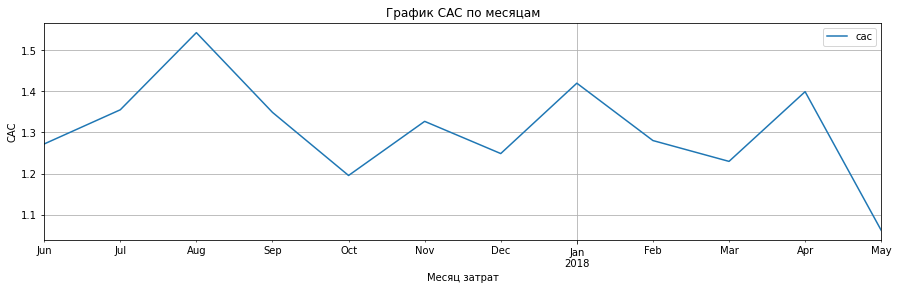

In [86]:
report_new_cac = report_new.pivot_table(index='first_order_month', values='cac', aggfunc='mean')
report_new_cac.plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц затрат')
plt.ylabel('CAC')
plt.title('График CAC по месяцам')
plt.show()

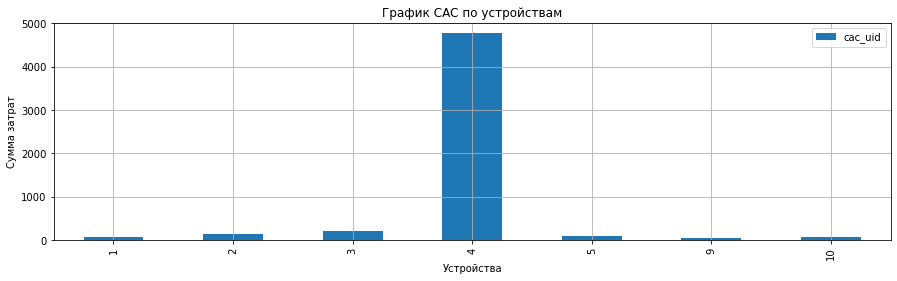

In [87]:
report_cost.pivot_table(index='source_id', values='cac_uid', aggfunc='mean').plot(grid=True, kind='bar', figsize=(15, 4))
plt.xlabel('Устройства')
plt.ylabel('Сумма затрат')
plt.title('График CAC по устройствам')
plt.show()

In [88]:
costs_month = costs[['month', 'source_id']]
costs_month.columns = ['orders_month', 'source_id_w']
costs_month.head()

,orders_month,source_id_w
0,2017-06-01,1
1,2017-06-01,1
2,2017-06-01,1
3,2017-06-01,1
4,2017-06-01,1


In [89]:
source_month = costs_month.merge(report_new, on='orders_month')
source_month.head()

,orders_month,source_id_w,source_id,month,costs,first_order_month,n_buyers,revenue,gp,age,ltv,cac
0,2017-06-01,1,1,2017-06-01,1125.61,2017-06-01,2023,9557.49,9557.49,0,4.724414,0.556406
1,2017-06-01,1,2,2017-06-01,2427.38,2017-06-01,2023,9557.49,9557.49,0,4.724414,1.199891
2,2017-06-01,1,3,2017-06-01,7731.65,2017-06-01,2023,9557.49,9557.49,0,4.724414,3.821873
3,2017-06-01,1,4,2017-06-01,3514.80,2017-06-01,2023,9557.49,9557.49,0,4.724414,1.737420
4,2017-06-01,1,5,2017-06-01,2616.12,2017-06-01,2023,9557.49,9557.49,0,4.724414,1.293188


In [90]:
source_month_cac = source_month.pivot_table(index='first_order_month', columns='source_id', values='cac')
source_month_cac

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,0.556406,1.199891,3.821873,1.737420,1.293188,0.140989,0.155324
2017-07-01,0.557920,1.213266,3.990832,1.835533,1.559095,0.157327,0.171513
2017-08-01,0.694752,1.321934,4.484336,2.348438,1.595095,0.181701,0.169759
2017-09-01,0.581949,1.156784,3.860345,2.011724,1.491337,0.161031,0.178485
2017-10-01,0.533583,1.116359,3.626092,1.479456,1.328894,0.140417,0.144525
2017-11-01,0.599157,1.285881,4.171855,1.320466,1.549949,0.167405,0.194158
2017-12-01,0.534155,1.117454,3.700552,1.752332,1.339840,0.150121,0.147356
2018-01-01,0.648141,1.232653,4.390388,1.729259,1.592505,0.162218,0.182138
2018-02-01,0.603802,1.225511,3.897168,1.564492,1.389019,0.151055,0.131712


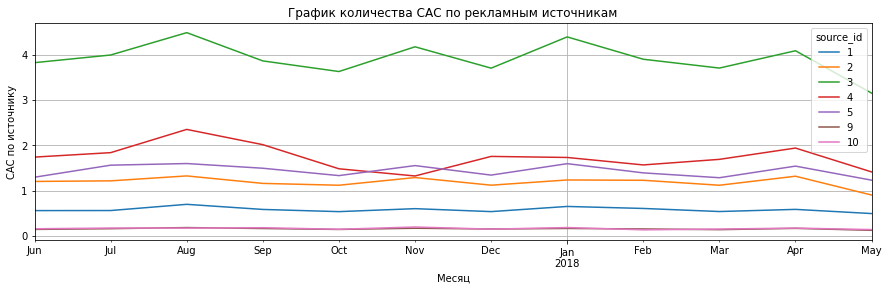

In [91]:
ax = source_month_cac.plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц')
plt.ylabel('CAC по источнику')
plt.title('График количества САС по рекламным источникам')
#ax.set_xticklabels(source_month.index.date)
plt.show()

In [92]:
costs_table = costs_table.reset_index()

In [93]:
cost_table = costs_table.rename(columns={'month':'first_order_month'})
cost_table

,first_order_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [94]:
cac_buyers = cost_table.merge(cohort_sizes,on='first_order_month')
cac_buyers['cac'] = cac_buyers['costs']/cac_buyers['n_buyers']
cac_buyers

,first_order_month,costs,n_buyers,cac
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327
5,2017-11-01,37907.88,4081,9.288870
6,2017-12-01,38315.35,4383,8.741809
7,2018-01-01,33518.52,3373,9.937302
8,2018-02-01,32723.03,3651,8.962758
9,2018-03-01,30415.27,3533,8.608907


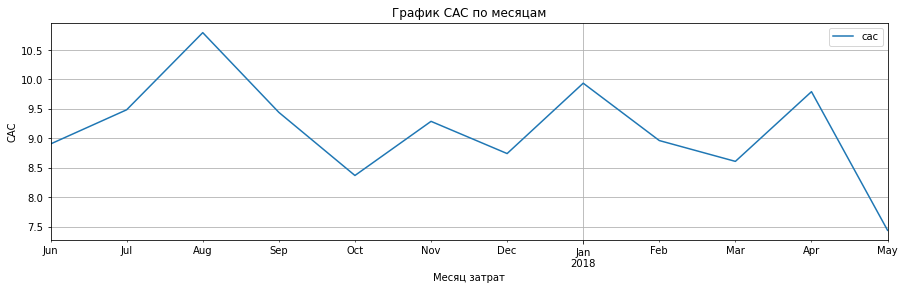

In [95]:
buyers_new_cac = cac_buyers.pivot_table(index='first_order_month', values='cac')
buyers_new_cac.plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц затрат')
plt.ylabel('CAC')
plt.title('График CAC по месяцам')
plt.show()

Рассчитаем ROMI: поделим LTV на CAC.

In [96]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

In [97]:
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,11.99,13.23,14.34,16.76,19.36,21.23,23.64,25.11,26.52,28.06,29.51,30.16
2017-07-01,13.94,14.72,16.17,17.00,17.41,17.77,18.05,18.38,18.75,19.10,19.46,NaN
2017-08-01,11.21,12.21,13.18,14.01,15.06,15.66,16.11,16.97,17.59,17.99,NaN,NaN
2017-09-01,12.76,15.28,16.46,25.45,26.35,27.82,29.40,29.95,30.37,NaN,NaN,NaN
2017-10-01,13.23,14.65,15.16,15.57,15.97,16.29,16.52,16.82,NaN,NaN,NaN,NaN
2017-11-01,11.20,12.07,12.50,13.21,13.53,13.65,13.90,NaN,NaN,NaN,NaN,NaN
2017-12-01,12.05,12.71,15.06,17.77,18.57,19.43,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,9.12,9.77,10.45,10.76,10.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,10.87,11.60,11.80,11.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


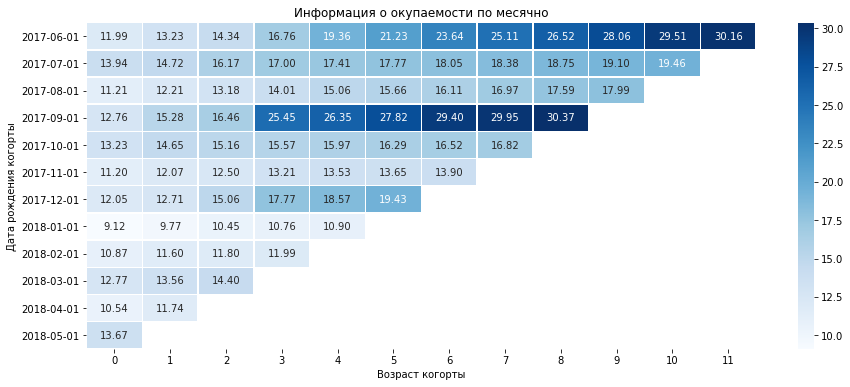

In [98]:
plt.figure(figsize=(15, 6))
ax=sns.heatmap(output.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
ax.set_yticklabels(output.index.date)
plt.title('Информация о окупаемости по месячно')
plt.xlabel('Возраст когорты')
plt.ylabel('Дата рождения когорты')
plt.show()

Узнаем, как быстро в среднем когорты окупаются. Усредним значения каждой колонки и «сложим» таблицу в единую строку методом mean(axis=0)

In [99]:
output.cumsum(axis=1).mean(axis=0)

age
0     11.946568
1     12.868300
2     13.951808
3     15.837340
4     17.144902
5     18.835679
6     19.603298
7     21.448392
8     23.308561
9     21.714999
10    24.482607
11    30.159834
dtype: float64

Примем за 8 мес. жизненный цикл и найдем среднее значение LTV

In [100]:
LTV_mean = result.iloc[:9, :8]
LTV_mean
LTV_mean.loc[:, 'LTV_sum'] = LTV_mean.sum(axis=1)
LTV_mean['LTV_sum'].mean().round(2)

46.31

Рассчитаем ROMI по источникам

In [101]:
report_cost['ltv_mean'] = 7.66
report_cost['romi'] = (report_cost['ltv_mean'] / report_cost['cac_uid']).round(2)
report_cost.sort_values(by='romi', ascending=False)

,source_id,costs,first_order_month,uid,cac_uid,ltv_mean,romi
70,9,5517.49,2018-03-01,192,28.74,7.66,0.27
66,9,5517.49,2017-11-01,189,29.19,7.66,0.26
77,10,5822.49,2017-10-01,191,30.48,7.66,0.25
65,9,5517.49,2017-10-01,174,31.71,7.66,0.24
82,10,5822.49,2018-03-01,178,32.71,7.66,0.23
...,...,...,...,...,...,...,...
14,2,42806.04,2017-08-01,153,279.78,7.66,0.03
24,3,141321.63,2017-06-01,574,246.20,7.66,0.03
26,3,141321.63,2017-08-01,290,487.32,7.66,0.02
25,3,141321.63,2017-07-01,443,319.01,7.66,0.02


Посчитаем по какому источнику привлечено больше всего дохода.

Соберем вместе две таблицы и сделаем из них одну с расходами и выручкой по рекламным источникам.

In [102]:
source_order = visits.merge(orders, on='uid')

In [103]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
order_source = source_order.pivot_table(index='source_id', values='revenue', aggfunc='sum').reset_index()
round(pd.DataFrame(order_source['revenue'].apply(lambda x: format(x, 'f'))), 2).reset_index()
order_source.columns = ['source_id', 'revenue']

In [104]:
costs_source.reset_index()
revenue_costs = costs_source.merge(order_source, on='source_id')
revenue_costs

,source_id,costs,revenue
0,1,20833.270,2298200.170
1,2,42806.040,2638189.210
2,3,141321.630,296687.960
3,4,61073.600,496690.170
4,5,51757.100,1181477.140
5,9,5517.490,36342.250
6,10,5822.490,14619.230


In [105]:
revenue_costs['income'] = revenue_costs['revenue'] - revenue_costs['costs']
revenue_costs.sort_values(by='income', ascending=False)

,source_id,costs,revenue,income
1,2,42806.040,2638189.210,2595383.170
0,1,20833.270,2298200.170,2277366.900
4,5,51757.100,1181477.140,1129720.040
3,4,61073.600,496690.170,435616.570
2,3,141321.630,296687.960,155366.330
5,9,5517.490,36342.250,30824.760
6,10,5822.490,14619.230,8796.740


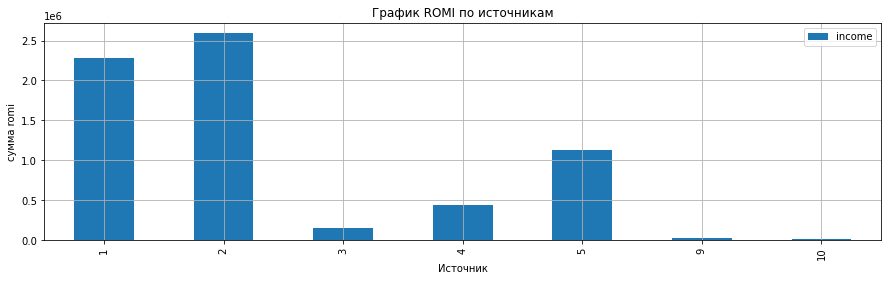

In [106]:
revenue_romi = revenue_costs.pivot_table(index='source_id', values='income', aggfunc='mean')
revenue_romi.plot(grid=True, kind='bar', figsize=(15, 4))
plt.xlabel('Источник')
plt.ylabel('сумма romi')
plt.title('График ROMI по источникам')
plt.show()

#### Вывод  
Только две когорты достигли окупаемости. Июньская когорта окупилась на 7 месяце жизни, и сентябрьская на 4 месяце жизни.  
В среднем когорты окупаются к 9 месяцу жизни.  
Лучшие источники по окупаемости ROMI 9,10,1.  
Лучшие источники по доходу 2,1,5

#### Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени

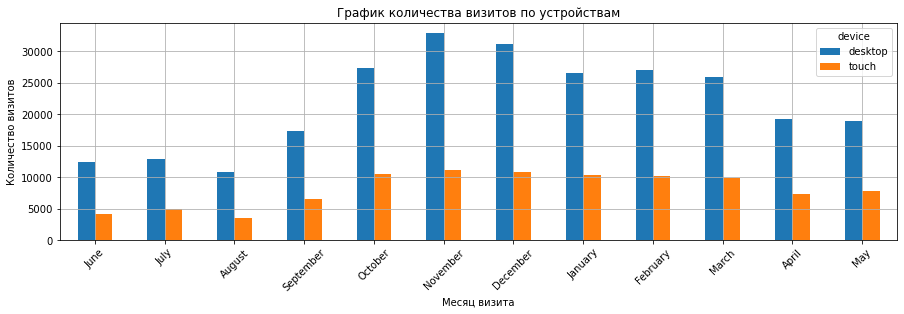

In [107]:
device_plot = visits.pivot_table(index='session_month', columns='device', values='uid', aggfunc='count')
ax = device_plot.plot(grid=True, kind='bar', figsize=(15, 4))
ax.set_xticklabels(month_lst, rotation=45)
plt.xlabel('Месяц визита')
plt.ylabel('Количество визитов')
plt.title('График количества визитов по устройствам')
plt.show()

In [108]:
orders_visits = orders.merge(visits, on='uid') 
orders_visits.head()

,buy_ts,revenue,uid,first_order_date,first_visit_date,order_time,orders_month,first_order_month,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration,activity_date
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2.000,2017-06-01
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,11.000,2017-06-01
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,9.000,2017-06-01
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,19.000,2017-06-01
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.000,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,28.000,2017-06-01


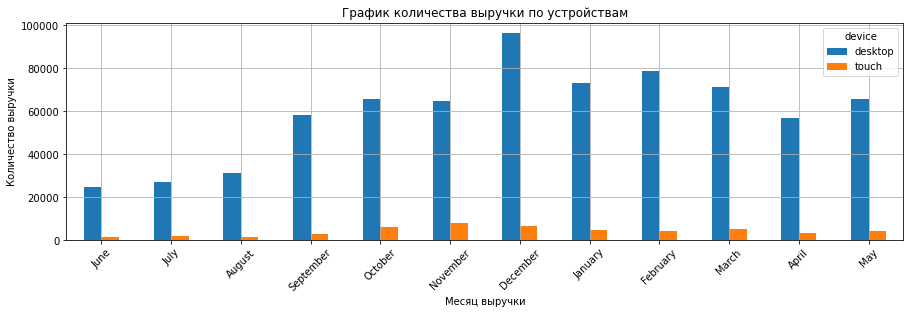

In [109]:
device_revenue = orders_visits.pivot_table(index='session_month', columns='device', values='revenue', aggfunc='count')
ax = device_revenue.plot(grid=True, kind='bar', figsize=(15, 4))
ax.set_xticklabels(month_lst, rotation=45)
plt.xlabel('Месяц выручки')
plt.ylabel('Количество выручки')
plt.title('График количества выручки по устройствам')
plt.show()

In [110]:
source_month = visits.pivot_table(index='session_month', columns='source_id', values='uid', aggfunc='nunique')
source_month;

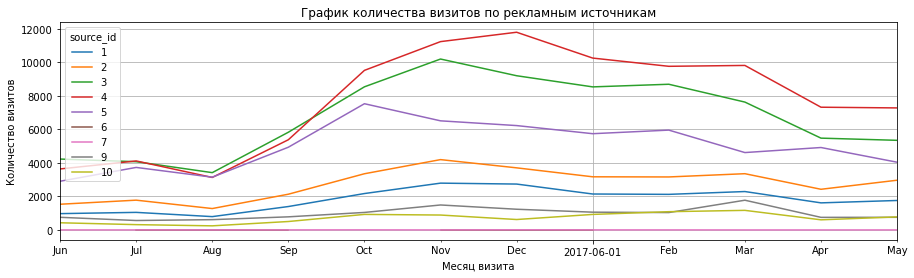

In [111]:
ax = source_month.plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц визита')
plt.ylabel('Количество визитов')
plt.title('График количества визитов по рекламным источникам')
ax.set_xticklabels(source_month.index.date)
plt.show()

<div class="alert alert-info">
    <h2><a name="2.4."></a> 2.4. Графики LTV CAC ROMI по месяцам в разрезе источников</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

Отсортируем таблицу `visits` по возрастанию `start_ts` 

In [112]:
visits = visits.sort_values(by='start_ts')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,activity_date
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017-01-01,2017-06-01,2017-06-01,2017-06-01,1.000,2017-06-01
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017-01-01,2017-06-01,2017-06-01,2017-06-01,0.000,2017-06-01
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017-01-01,2017-06-01,2017-06-01,2017-06-01,14.000,2017-06-01
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017-01-01,2017-06-01,2017-06-01,2017-06-01,0.000,2017-06-01
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2.000,2017-06-01


Сгруппируем полученную таблицу по `uid` и применим метод `first()`

In [113]:
first_visits = visits.groupby('uid').first().reset_index()
first_visits.head()

,uid,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration,activity_date
0,11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-01-01,2018-03-01,2018-03-01,2018-03-01,6.000,2018-03-01
1,49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-01-01,2018-02-01,2018-02-01,2018-02-06,2.000,2018-02-06
2,297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-01-01,2017-06-01,2017-06-01,2017-06-07,1.000,2017-06-07
3,313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-01-01,2017-09-01,2017-09-14,2017-09-18,18.000,2017-09-18
4,325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017-01-01,2017-09-01,2017-09-28,2017-09-30,9.000,2017-09-30


Получим табличку словарик с уникальными `uid`, где вторым столбцом будет первый источник трафика.

In [114]:
uid_visits = first_visits.groupby('uid')['source_id'].min().reset_index()
uid_visits.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


Соеденим полученную табличку с `orders`. На каждой строке мы будем знать самый первый источник трафика конкретного юзера. 

In [115]:
orders_source_id = orders.merge(first_visits,on='uid')
orders_source_id.head()

,buy_ts,revenue,uid,first_order_date,first_visit_date,order_time,orders_month,first_order_month,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration,activity_date
0,2017-06-01 00:10:00,17.000,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,1.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,2.000,2017-06-01
1,2017-06-01 00:25:00,0.550,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,11.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,11.000,2017-06-01
2,2017-06-01 00:27:00,0.370,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,2.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,9.000,2017-06-01
3,2017-06-01 00:29:00,0.550,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,15.000,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,19.000,2017-06-01
4,2017-06-01 07:58:00,0.370,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,27.000,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-01-01,2017-06-01,2017-06-01,2017-06-01,28.000,2017-06-01


Посчитаем количество новых покупателей `n_buyers` за каждый месяц

In [116]:
cohort_sizes_df = orders_source_id.groupby(['first_order_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_df.columns = ['first_order_month', 'source_id','n_buyers']
cohort_sizes_df.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.

In [117]:
cohorts_df = orders_source_id.groupby(['first_order_month', 'orders_month', 'source_id']).agg({'revenue':'sum'}).reset_index()
cohorts_df = cohort_sizes_df.merge(cohorts_df, on=['first_order_month', 'source_id'])
cohorts_df.head()

,first_order_month,source_id,n_buyers,orders_month,revenue
0,2017-06-01,1,190,2017-06-01,1378.700
1,2017-06-01,1,190,2017-07-01,414.980
2,2017-06-01,1,190,2017-08-01,419.430
3,2017-06-01,1,190,2017-09-01,714.240
4,2017-06-01,1,190,2017-10-01,811.200


Найдем валовую прибыль, умножив выручку на маржинальность. Маржинальность примем за 1. Добавим возраст когорты

In [118]:
margin_rate = 1 # маржинальность магазина
cohorts_df['gp'] = cohorts_df['revenue'] * margin_rate # посчитаем валовую прибыль
cohorts_df['age'] = (cohorts_df['orders_month'] - cohorts_df['first_order_month']) / np.timedelta64(1, 'M') # посчитаем возраст каждой когорты в месяцах, не забудьте что возраст должен быть целым значением 
cohorts_df['age'] = cohorts_df['age'].round().astype('int')

Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Получим LTV 

In [119]:
cohorts_df['ltv'] = cohorts_df['gp'] / cohorts_df['n_buyers'] # посчитаем LTV когорт
cohorts_df.head()

,first_order_month,source_id,n_buyers,orders_month,revenue,gp,age,ltv
0,2017-06-01,1,190,2017-06-01,1378.700,1378.700,0,7.256
1,2017-06-01,1,190,2017-07-01,414.980,414.980,1,2.184
2,2017-06-01,1,190,2017-08-01,419.430,419.430,2,2.208
3,2017-06-01,1,190,2017-09-01,714.240,714.240,3,3.759
4,2017-06-01,1,190,2017-10-01,811.200,811.200,4,4.269


Визуализируем когорты в виде сводной таблицы и графика LTV в разрезе источников

In [120]:
ltv_month = cohorts_df.pivot_table(index='first_order_month', columns='source_id', values='ltv')
ltv_month

source_id,1,2,3,4,5,7,9,10
first_order_month,,,,,,,,
2017-06-01,2.804,1.388,0.475,1.007,0.950,nan,0.631,0.847
2017-07-01,1.899,1.030,0.668,0.571,0.616,nan,0.640,0.912
2017-08-01,1.868,0.831,0.614,0.648,1.012,1.220,0.593,1.131
2017-09-01,1.157,2.967,0.765,0.856,2.908,nan,1.074,0.376
2017-10-01,1.048,1.563,0.715,0.643,0.755,nan,0.878,0.356
2017-11-01,1.453,1.389,0.713,0.965,0.744,nan,0.647,0.726
2017-12-01,0.925,6.173,0.790,0.761,0.886,nan,0.792,1.328
2018-01-01,1.405,1.549,0.912,0.818,1.063,nan,0.663,1.061
2018-02-01,1.531,1.661,1.062,1.064,1.118,nan,1.683,0.865


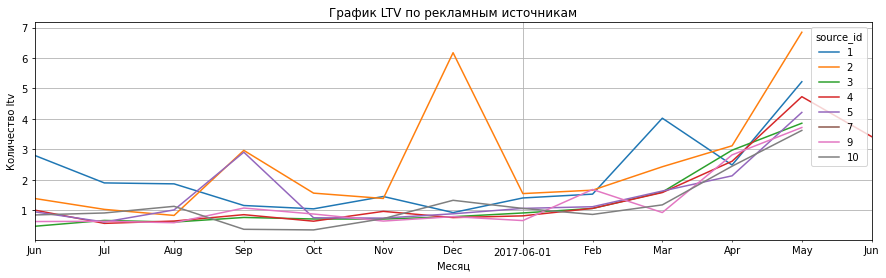

In [121]:
ax = ltv_month.plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц')
plt.ylabel('Количество ltv')
plt.title('График LTV по рекламным источникам')
ax.set_xticklabels(source_month.index.date)
plt.show()

Сгруппируем таблицу о затратах по месяцу и сложим затраты.

In [122]:
monthly_costs = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
monthly_costs.columns = ['first_order_month', 'source_id', 'costs']
monthly_costs.head(10)

,first_order_month,source_id,costs
0,2017-06-01,1,1125.610
1,2017-06-01,2,2427.380
2,2017-06-01,3,7731.650
3,2017-06-01,4,3514.800
4,2017-06-01,5,2616.120
5,2017-06-01,9,285.220
6,2017-06-01,10,314.220
7,2017-07-01,1,1072.880
8,2017-07-01,2,2333.110
9,2017-07-01,3,7674.370


Соеденим две таблицы с LTV и затратами

In [123]:
report_cac = cohorts_df.merge(monthly_costs, on=['first_order_month', 'source_id'])
report_cac.head(5)

,first_order_month,source_id,n_buyers,orders_month,revenue,gp,age,ltv,costs
0,2017-06-01,1,190,2017-06-01,1378.700,1378.700,0,7.256,1125.610
1,2017-06-01,1,190,2017-07-01,414.980,414.980,1,2.184,1125.610
2,2017-06-01,1,190,2017-08-01,419.430,419.430,2,2.208,1125.610
3,2017-06-01,1,190,2017-09-01,714.240,714.240,3,3.759,1125.610
4,2017-06-01,1,190,2017-10-01,811.200,811.200,4,4.269,1125.610


Расчитаем затраты CAC, поделив затраты на количество пользователей в каждой когорте

In [124]:
report_cac['cac'] = report_cac['costs'] / report_cac['n_buyers']
report_cac.head()

,first_order_month,source_id,n_buyers,orders_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,1,190,2017-06-01,1378.700,1378.700,0,7.256,1125.610,5.924
1,2017-06-01,1,190,2017-07-01,414.980,414.980,1,2.184,1125.610,5.924
2,2017-06-01,1,190,2017-08-01,419.430,419.430,2,2.208,1125.610,5.924
3,2017-06-01,1,190,2017-09-01,714.240,714.240,3,3.759,1125.610,5.924
4,2017-06-01,1,190,2017-10-01,811.200,811.200,4,4.269,1125.610,5.924


Визуализируем когорты в виде сводной таблицы и графика CAC в разрезе источников

In [125]:
cac_month = report_cac.pivot_table(index='first_order_month', columns='source_id', values='cac')
cac_month

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,5.924,10.329,12.119,8.510,6.813,4.194,3.308
2017-07-01,6.705,11.217,14.989,6.827,7.088,5.818,6.467
2017-08-01,8.423,14.724,18.230,9.519,6.070,4.081,6.286
2017-09-01,6.617,13.510,12.757,8.800,6.535,4.777,5.357
2017-10-01,6.811,12.235,13.661,5.479,6.103,4.837,3.001
2017-11-01,7.547,13.185,14.001,4.578,9.127,4.712,6.190
2017-12-01,7.073,12.855,12.316,5.578,7.617,5.438,7.598
2018-01-01,9.186,14.239,14.720,5.652,8.486,6.839,6.678
2018-02-01,8.016,15.271,13.030,5.165,7.480,6.565,3.910


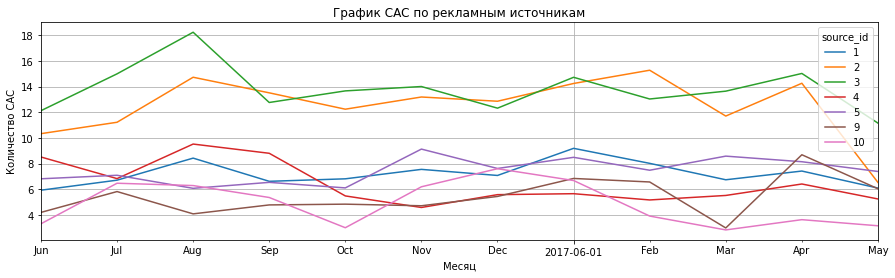

In [126]:
ax = cac_month.plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц')
plt.ylabel('Количество CAC')
plt.title('График CAC по рекламным источникам')
ax.set_xticklabels(source_month.index.date)
plt.show()

Найдем ROMI поделив LTV на CAC

In [127]:
report_cac['romi'] = report_cac['ltv'] / report_cac['cac']
report_cac.head()

,first_order_month,source_id,n_buyers,orders_month,revenue,gp,age,ltv,costs,cac,romi
0,2017-06-01,1,190,2017-06-01,1378.700,1378.700,0,7.256,1125.610,5.924,1.225
1,2017-06-01,1,190,2017-07-01,414.980,414.980,1,2.184,1125.610,5.924,0.369
2,2017-06-01,1,190,2017-08-01,419.430,419.430,2,2.208,1125.610,5.924,0.373
3,2017-06-01,1,190,2017-09-01,714.240,714.240,3,3.759,1125.610,5.924,0.635
4,2017-06-01,1,190,2017-10-01,811.200,811.200,4,4.269,1125.610,5.924,0.721


Визуализируем когорты в виде сводной таблицы и графика ROMI в разрезе источников

In [128]:
romi_month = report_cac.pivot_table(index='first_order_month', columns='source_id', values='romi')
romi_month

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,0.473,0.134,0.039,0.118,0.139,0.150,0.256
2017-07-01,0.283,0.092,0.045,0.084,0.087,0.110,0.141
2017-08-01,0.222,0.056,0.034,0.068,0.167,0.145,0.180
2017-09-01,0.175,0.220,0.060,0.097,0.445,0.225,0.070
2017-10-01,0.154,0.128,0.052,0.117,0.124,0.182,0.119
2017-11-01,0.193,0.105,0.051,0.211,0.081,0.137,0.117
2017-12-01,0.131,0.480,0.064,0.136,0.116,0.146,0.175
2018-01-01,0.153,0.109,0.062,0.145,0.125,0.097,0.159
2018-02-01,0.191,0.109,0.081,0.206,0.149,0.256,0.221


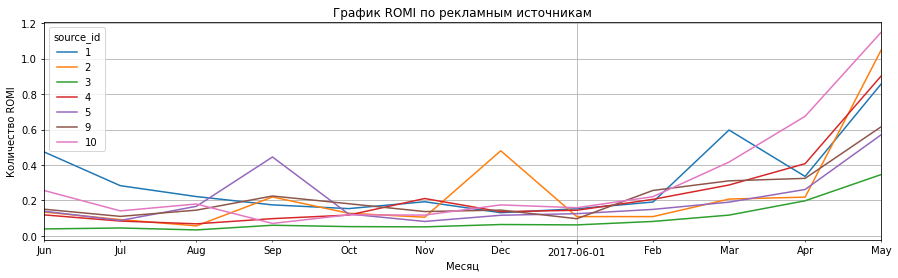

In [129]:
ax = romi_month.plot(grid=True, style='-', figsize=(15, 4))
plt.xlabel('Месяц')
plt.ylabel('Количество ROMI')
plt.title('График ROMI по рекламным источникам')
ax.set_xticklabels(source_month.index.date)
plt.show()

Посмотрим окупаемость когорт по годам жизни в разрезе источников

In [130]:
output_romi = report_cac.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')
output_romi.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.700,0.790,0.890,1.090,1.290,1.420,1.590,1.710,1.810,1.920,2.010,2.080
2017-07-01,0.730,0.780,0.940,1.010,1.050,1.080,1.110,1.130,1.170,1.200,1.230,nan
2017-08-01,0.670,0.730,0.810,0.860,0.930,0.960,1.000,1.070,1.120,1.150,nan,nan
2017-09-01,0.680,0.850,0.930,1.340,1.400,1.480,1.570,1.620,1.670,nan,nan,nan
2017-10-01,0.770,0.860,0.890,0.920,0.940,0.970,0.980,1.000,nan,nan,nan,nan
2017-11-01,0.710,0.760,0.800,0.850,0.870,0.880,0.900,nan,nan,nan,nan,nan
2017-12-01,0.610,0.650,0.790,0.960,1.000,1.040,nan,nan,nan,nan,nan,nan
2018-01-01,0.470,0.500,0.530,0.560,0.570,nan,nan,nan,nan,nan,nan,nan
2018-02-01,0.570,0.610,0.620,0.630,nan,nan,nan,nan,nan,nan,nan,nan


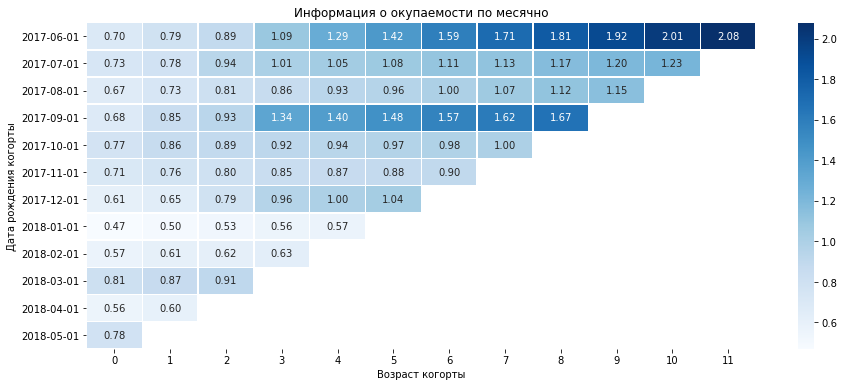

In [131]:
plt.figure(figsize=(15, 6))
ax=sns.heatmap(output_romi.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
ax.set_yticklabels(output.index.date)
plt.title('Информация о окупаемости по месячно')
plt.xlabel('Возраст когорты')
plt.ylabel('Дата рождения когорты')
plt.show()

<div class="alert alert-info">
    <h2><a name="3."></a> 3. Вывод </h2>
</div>

<font>[к Оглавлению](#0.0)</font>

Рассчитаны показатели пользовательской активности:

- за день DAU - 907 человек
- за неделю WAU - 5716 человек
- за месяц MAU - 23228 человек.


Средний чек разный в каждом месяце. В декабре средний чек выше всех других месяцев. Самый маленький чек в январе 2018 года.
- Средний чек в день 4.94
- Средний чек в неделю 5.0
- Средний чек в месяц 4.84

По проведенному анализу можно сделать выводы:

- В основном 90-95% людей уходит, в целом бизнес "одноразовый". 
- Retention Rate в первый месяц убывает по когортам с течением времени. Если для когорты пользователей, пришедших в июне 2017 Retention Rate в первый месяц составляет 7,6%, то для пользователей, пришедших в апреле 2018 — уже 4,6%. Так, за 11 месяцев коэффициент удержания упал на 3%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки;
- Среднее цена привлечения одного покупателя по источникам равняется 7,6. Минимальная цена привлечение одного покупателя из источника 9, но из него же и меньше всего кол-во привлеченных людей. Следует обратить внимания на источники 1 и 4, они наиболее оптимальные;
- В среднем каждый покупатель из первой когорты принес по 11,88 рублей выручки за 12 месяцев «жизни». Выделяется когорта 2017-09-01 - по ней прибыль с каждого покупателя выше, чем по остальным;	
- По ROMI видно, что в среднем когорты окупаются к концу 8 месяца. Самыми окупаемыми источниками оказались 9, 10 и 1.
- Наибольшее количество денег и покупателей принесли источники 2,1,5.
- С компьютера заходят примерно раза в 2,5 чаще, чем с мобильных устройств. Рекомендуется больше уделять внимание этим пользователям.

В результате анализа бизнес показателей можно сделать выводы, что следует ориентироваться на пользователей, заходящих на сервис через стационарные компьютеры, desktop.

Маркетинговый бюджет стоит перераспределить в пользу 2-го, 1-го и 5-го рекламных источников. Ресурсы можно взять из средств, направляемых на 3-й, 4-й источники. Расходы на рекламу через 3-й источник следует приостановить.